In [1]:
#Import the liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
%matplotlib inline
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Import the data
telecomdata = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Print the deatils of the dataframe
print(telecomdata.columns)
print("\n")
print(telecomdata.shape)

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)


(99999, 226)


In [4]:
telecomdata.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [5]:
# Converting mobile number and circle id to object
telecomdata['mobile_number'] = telecomdata['mobile_number'].astype(object)
telecomdata['circle_id'] = telecomdata['circle_id'].astype(object)
telecomdata['night_pck_user_6'] = telecomdata['night_pck_user_6'].astype(object)
telecomdata['night_pck_user_7'] = telecomdata['night_pck_user_7'].astype(object)
telecomdata['night_pck_user_8'] = telecomdata['night_pck_user_8'].astype(object)
telecomdata['night_pck_user_9'] = telecomdata['night_pck_user_9'].astype(object)
telecomdata['fb_user_6'] = telecomdata['fb_user_6'].astype(object)
telecomdata['fb_user_7'] = telecomdata['fb_user_7'].astype(object)
telecomdata['fb_user_8'] = telecomdata['fb_user_8'].astype(object)
telecomdata['fb_user_9'] = telecomdata['fb_user_9'].astype(object)

In [6]:
# To check that the mobile numbers are unique
len(telecomdata['mobile_number'].unique())

99999

In [7]:
# Creating a dataframe of columns having null values
null_columns=telecomdata.columns[telecomdata.isnull().any()]
telecomdata[null_columns].isnull().sum()

loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
loc_og_t2t_mou_7         3859
loc_og_t2t_mou_8         5378
loc_og_t2t_mou_9         7745
loc_og_t2m_mou_6         3937
loc_og_t2m_mou_7         3859
loc_og_t2m_mou_8         5378
loc_og_t2m_mou_9         7745
                        ...  
max_rech_data_8         73660
max_rech_data_9         74077
count_rech

In [8]:
round(telecomdata[null_columns].isnull().sum()/len(telecomdata.index),2)

loc_og_t2o_mou          0.01
std_og_t2o_mou          0.01
loc_ic_t2o_mou          0.01
last_date_of_month_7    0.01
last_date_of_month_8    0.01
last_date_of_month_9    0.02
onnet_mou_6             0.04
onnet_mou_7             0.04
onnet_mou_8             0.05
onnet_mou_9             0.08
offnet_mou_6            0.04
offnet_mou_7            0.04
offnet_mou_8            0.05
offnet_mou_9            0.08
roam_ic_mou_6           0.04
roam_ic_mou_7           0.04
roam_ic_mou_8           0.05
roam_ic_mou_9           0.08
roam_og_mou_6           0.04
roam_og_mou_7           0.04
roam_og_mou_8           0.05
roam_og_mou_9           0.08
loc_og_t2t_mou_6        0.04
loc_og_t2t_mou_7        0.04
loc_og_t2t_mou_8        0.05
loc_og_t2t_mou_9        0.08
loc_og_t2m_mou_6        0.04
loc_og_t2m_mou_7        0.04
loc_og_t2m_mou_8        0.05
loc_og_t2m_mou_9        0.08
                        ... 
max_rech_data_8         0.74
max_rech_data_9         0.74
count_rech_2g_6         0.75
count_rech_2g_

In [9]:
print(telecomdata['loc_og_t2o_mou'].astype('category').value_counts())
print("\n")
print(telecomdata['std_og_t2o_mou'].astype('category').value_counts())
print("\n")
print(telecomdata['loc_ic_t2o_mou'].astype('category').value_counts())
print("\n")
print(telecomdata['last_date_of_month_6'].astype('category').value_counts())
print("\n")
print(telecomdata['last_date_of_month_7'].astype('category').value_counts())
print("\n")
print(telecomdata['last_date_of_month_8'].astype('category').value_counts())
print("\n")
print(telecomdata['last_date_of_month_9'].astype('category').value_counts())
print("\n")
print(telecomdata['circle_id'].astype('category').value_counts())
print("\n")

0.0    98981
Name: loc_og_t2o_mou, dtype: int64


0.0    98981
Name: std_og_t2o_mou, dtype: int64


0.0    98981
Name: loc_ic_t2o_mou, dtype: int64


6/30/2014    99999
Name: last_date_of_month_6, dtype: int64


7/31/2014    99398
Name: last_date_of_month_7, dtype: int64


8/31/2014    98899
Name: last_date_of_month_8, dtype: int64


9/30/2014    98340
Name: last_date_of_month_9, dtype: int64


109    99999
Name: circle_id, dtype: int64




In [10]:
# Dropping the columns as they have a only one single value or blank value
telecomdata.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6',
                  'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','circle_id'],axis = 1,inplace = True)

In [11]:
telecomdata[['onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9','offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9']].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222
std,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,327.170662,319.396092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.380000,6.660000,6.460000,5.330000,34.730000,32.190000,31.630000,27.130000
50%,34.310000,32.330000,32.360000,29.840000,96.310000,91.735000,92.140000,87.290000
75%,118.740000,115.595000,115.860000,112.130000,231.860000,226.815000,228.260000,220.505000
max,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,14007.340000,10310.760000


In [12]:
# Columns having Null Values replacing with 0
telecomdata.loc[telecomdata.onnet_mou_6.isnull(),'onnet_mou_6']= 0.0
telecomdata.loc[telecomdata.onnet_mou_7.isnull(),'onnet_mou_7']= 0.0
telecomdata.loc[telecomdata.onnet_mou_8.isnull(),'onnet_mou_8']= 0.0
telecomdata.loc[telecomdata.onnet_mou_9.isnull(),'onnet_mou_9']= 0.0
telecomdata.loc[telecomdata.offnet_mou_6.isnull(),'offnet_mou_6']= 0.0
telecomdata.loc[telecomdata.offnet_mou_7.isnull(),'offnet_mou_7']= 0.0
telecomdata.loc[telecomdata.offnet_mou_8.isnull(),'offnet_mou_8']= 0.0
telecomdata.loc[telecomdata.offnet_mou_9.isnull(),'offnet_mou_9']= 0.0

In [13]:
telecomdata[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9',
             'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','roam_og_mou_9']].describe()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519
std,72.825411,73.447948,68.402466,57.137537,71.443196,58.455762,64.713221,58.438186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13724.380000,15371.040000,13095.360000,8464.030000,3775.110000,2812.040000,5337.040000,4428.460000


In [14]:
# Columns having Null Values replacing with 0
telecomdata.loc[telecomdata.roam_ic_mou_6.isnull(),'roam_ic_mou_6']= 0.0
telecomdata.loc[telecomdata.roam_ic_mou_7.isnull(),'roam_ic_mou_7']= 0.0
telecomdata.loc[telecomdata.roam_ic_mou_8.isnull(),'roam_ic_mou_8']= 0.0
telecomdata.loc[telecomdata.roam_ic_mou_9.isnull(),'roam_ic_mou_9']= 0.0
telecomdata.loc[telecomdata.roam_og_mou_6.isnull(),'roam_og_mou_6']= 0.0
telecomdata.loc[telecomdata.roam_og_mou_7.isnull(),'roam_og_mou_7']= 0.0
telecomdata.loc[telecomdata.roam_og_mou_8.isnull(),'roam_og_mou_8']= 0.0
telecomdata.loc[telecomdata.roam_og_mou_9.isnull(),'roam_og_mou_9']= 0.0

In [15]:
telecomdata[['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9',
             'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9',
             'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
             'loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_t2c_mou_9']].describe()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726
std,150.856393,155.318705,151.184830,147.995390,162.780544,157.492308,156.537048,158.681454,14.230438,14.264986,13.270996,13.457549,5.448946,7.533445,6.783335,5.619021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.660000,1.630000,1.600000,1.360000,9.880000,10.025000,9.810000,8.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.910000,11.610000,11.730000,11.260000,41.030000,40.430000,40.360000,39.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.960000,39.910000,40.110000,39.280000,110.390000,107.560000,109.090000,106.810000,2.080000,2.090000,2.040000,1.940000,0.000000,0.000000,0.000000,0.000000
max,6431.330000,7400.660000,10752.560000,10389.240000,4729.740000,4557.140000,4961.330000,4429.880000,1466.030000,1196.430000,928.490000,927.410000,342.860000,916.240000,502.090000,339.840000


In [16]:
# Columns having Null Values replacing with 0
telecomdata.loc[telecomdata.loc_og_t2t_mou_6.isnull(),'loc_og_t2t_mou_6']= 0.0
telecomdata.loc[telecomdata.loc_og_t2t_mou_7.isnull(),'loc_og_t2t_mou_7']= 0.0
telecomdata.loc[telecomdata.loc_og_t2t_mou_8.isnull(),'loc_og_t2t_mou_8']= 0.0
telecomdata.loc[telecomdata.loc_og_t2t_mou_9.isnull(),'loc_og_t2t_mou_9']= 0.0
telecomdata.loc[telecomdata.loc_og_t2m_mou_6.isnull(),'loc_og_t2m_mou_6']= 0.0
telecomdata.loc[telecomdata.loc_og_t2m_mou_7.isnull(),'loc_og_t2m_mou_7']= 0.0
telecomdata.loc[telecomdata.loc_og_t2m_mou_8.isnull(),'loc_og_t2m_mou_8']= 0.0
telecomdata.loc[telecomdata.loc_og_t2m_mou_9.isnull(),'loc_og_t2m_mou_9']= 0.0
telecomdata.loc[telecomdata.loc_og_t2f_mou_6.isnull(),'loc_og_t2f_mou_6']= 0.0
telecomdata.loc[telecomdata.loc_og_t2f_mou_7.isnull(),'loc_og_t2f_mou_7']= 0.0
telecomdata.loc[telecomdata.loc_og_t2f_mou_8.isnull(),'loc_og_t2f_mou_8']= 0.0
telecomdata.loc[telecomdata.loc_og_t2f_mou_9.isnull(),'loc_og_t2f_mou_9']= 0.0
telecomdata.loc[telecomdata.loc_og_t2c_mou_6.isnull(),'loc_og_t2c_mou_6']= 0.0
telecomdata.loc[telecomdata.loc_og_t2c_mou_7.isnull(),'loc_og_t2c_mou_7']= 0.0
telecomdata.loc[telecomdata.loc_og_t2c_mou_8.isnull(),'loc_og_t2c_mou_8']= 0.0
telecomdata.loc[telecomdata.loc_og_t2c_mou_9.isnull(),'loc_og_t2c_mou_9']= 0.0

In [17]:
telecomdata[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_mou_9']].describe()

,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000
mean,144.201175,141.670476,141.328209,138.709970
std,251.751489,248.731086,245.914311,245.934517
min,0.000000,0.000000,0.000000,0.000000
25%,17.110000,17.480000,17.110000,15.560000
50%,65.110000,63.685000,63.730000,61.840000
75%,168.270000,164.382500,166.110000,162.225000
max,10643.380000,7674.780000,11039.910000,11099.260000


In [18]:
# Columns having Null Values replacing with 0
telecomdata.loc[telecomdata.loc_og_mou_6.isnull(),'loc_og_mou_6']= 0.0
telecomdata.loc[telecomdata.loc_og_mou_7.isnull(),'loc_og_mou_7']= 0.0
telecomdata.loc[telecomdata.loc_og_mou_8.isnull(),'loc_og_mou_8']= 0.0
telecomdata.loc[telecomdata.loc_og_mou_9.isnull(),'loc_og_mou_9']= 0.0

In [19]:
telecomdata[['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9',
             'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9',
             'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2f_mou_9',
             'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9']].describe()

,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0
mean,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362,0.0,0.0,0.0,0.0
std,252.476533,263.631042,265.486090,267.184991,255.617850,269.347911,271.757783,261.407396,7.984970,8.599406,7.905971,8.261770,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,3.950000,3.635000,3.310000,2.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,30.807500,31.132500,30.580000,28.230000,53.290000,54.040000,52.490000,48.560000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,7366.580000,8133.660000,8014.430000,9382.580000,8314.760000,9284.740000,13950.040000,10223.430000,628.560000,544.630000,516.910000,808.490000,0.0,0.0,0.0,0.0


In [20]:
# Columns having Null Values replacing with 0
telecomdata.loc[telecomdata.std_og_t2t_mou_6.isnull(),'std_og_t2t_mou_6']= 0.0
telecomdata.loc[telecomdata.std_og_t2t_mou_7.isnull(),'std_og_t2t_mou_7']= 0.0
telecomdata.loc[telecomdata.std_og_t2t_mou_8.isnull(),'std_og_t2t_mou_8']= 0.0
telecomdata.loc[telecomdata.std_og_t2t_mou_9.isnull(),'std_og_t2t_mou_9']= 0.0
telecomdata.loc[telecomdata.std_og_t2m_mou_6.isnull(),'std_og_t2m_mou_6']= 0.0
telecomdata.loc[telecomdata.std_og_t2m_mou_7.isnull(),'std_og_t2m_mou_7']= 0.0
telecomdata.loc[telecomdata.std_og_t2m_mou_8.isnull(),'std_og_t2m_mou_8']= 0.0
telecomdata.loc[telecomdata.std_og_t2m_mou_9.isnull(),'std_og_t2m_mou_9']= 0.0
telecomdata.loc[telecomdata.std_og_t2f_mou_6.isnull(),'std_og_t2f_mou_6']= 0.0
telecomdata.loc[telecomdata.std_og_t2f_mou_7.isnull(),'std_og_t2f_mou_7']= 0.0
telecomdata.loc[telecomdata.std_og_t2f_mou_8.isnull(),'std_og_t2f_mou_8']= 0.0
telecomdata.loc[telecomdata.std_og_t2f_mou_9.isnull(),'std_og_t2f_mou_9']= 0.0
telecomdata.loc[telecomdata.std_og_t2c_mou_6.isnull(),'std_og_t2c_mou_6']= 0.0
telecomdata.loc[telecomdata.std_og_t2c_mou_7.isnull(),'std_og_t2c_mou_7']= 0.0
telecomdata.loc[telecomdata.std_og_t2c_mou_8.isnull(),'std_og_t2c_mou_8']= 0.0
telecomdata.loc[telecomdata.std_og_t2c_mou_9.isnull(),'std_og_t2c_mou_9']= 0.0

In [21]:
telecomdata[['std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9',
             'isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','isd_og_mou_9',
             'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9',
             'og_others_6','og_others_7','og_others_8','og_others_9']].describe()


,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,168.261218,175.221436,174.191498,169.664466,0.798277,0.776572,0.791247,0.723892,3.916811,4.978279,5.053769,4.412767,0.454157,0.030235,0.033372,0.047456
std,389.948499,408.922934,411.633049,405.138658,25.765248,25.603052,25.544471,21.310751,14.936449,20.661570,17.855111,16.328227,4.125911,2.161717,2.323464,3.635466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.640000,11.090000,10.410000,8.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,144.837500,150.615000,147.940000,142.105000,0.000000,0.000000,0.000000,0.000000,2.430000,3.710000,3.990000,3.230000,0.000000,0.000000,0.000000,0.000000
max,8432.990000,10936.730000,13980.060000,11495.310000,5900.660000,5490.280000,5681.540000,4244.530000,1023.210000,2372.510000,1390.880000,1635.710000,800.890000,370.130000,394.930000,787.790000


In [22]:
# Columns having Null Values replacing with 0
telecomdata.loc[telecomdata.std_og_mou_6.isnull(),'std_og_mou_6']= 0.0
telecomdata.loc[telecomdata.std_og_mou_7.isnull(),'std_og_mou_7']= 0.0
telecomdata.loc[telecomdata.std_og_mou_8.isnull(),'std_og_mou_8']= 0.0
telecomdata.loc[telecomdata.std_og_mou_9.isnull(),'std_og_mou_9']= 0.0
telecomdata.loc[telecomdata.isd_og_mou_6.isnull(),'isd_og_mou_6']= 0.0
telecomdata.loc[telecomdata.isd_og_mou_7.isnull(),'isd_og_mou_7']= 0.0
telecomdata.loc[telecomdata.isd_og_mou_8.isnull(),'isd_og_mou_8']= 0.0
telecomdata.loc[telecomdata.isd_og_mou_9.isnull(),'isd_og_mou_9']= 0.0
telecomdata.loc[telecomdata.spl_og_mou_6.isnull(),'spl_og_mou_6']= 0.0
telecomdata.loc[telecomdata.spl_og_mou_7.isnull(),'spl_og_mou_7']= 0.0
telecomdata.loc[telecomdata.spl_og_mou_8.isnull(),'spl_og_mou_8']= 0.0
telecomdata.loc[telecomdata.spl_og_mou_9.isnull(),'spl_og_mou_9']= 0.0
telecomdata.loc[telecomdata.og_others_6.isnull(),'og_others_6']= 0.0
telecomdata.loc[telecomdata.og_others_7.isnull(),'og_others_7']= 0.0
telecomdata.loc[telecomdata.og_others_8.isnull(),'og_others_8']= 0.0
telecomdata.loc[telecomdata.og_others_9.isnull(),'og_others_9']= 0.0

In [23]:
telecomdata[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9',
             'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
             'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
             'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9']].describe()

,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,47.922365,47.990520,47.211362,46.281794,107.475650,107.120493,108.460515,106.155471,12.084305,12.599697,11.751834,12.173105,167.491059,167.719540,167.432575,164.619293
std,140.258485,145.795055,137.239552,140.130610,171.713903,169.423620,169.723759,165.492803,40.140895,42.977442,39.125379,43.840776,254.124029,256.242707,250.025523,249.845070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.990000,3.230000,3.280000,3.290000,17.290000,18.590000,18.930000,18.560000,0.000000,0.000000,0.000000,0.000000,30.390000,32.460000,32.740000,32.290000
50%,15.690000,15.740000,16.030000,15.660000,56.490000,57.080000,58.240000,56.610000,0.880000,0.930000,0.930000,0.960000,92.160000,92.550000,93.830000,91.640000
75%,46.840000,45.810000,46.290000,45.180000,132.387500,130.960000,133.930000,130.490000,8.140000,8.282500,8.110000,8.140000,208.075000,205.837500,207.280000,202.737500
max,6626.930000,9324.660000,10696.230000,10598.830000,4693.860000,4455.830000,6274.190000,5463.780000,1872.340000,1983.010000,2433.060000,4318.280000,7454.630000,9669.910000,10830.160000,10796.290000


In [24]:
# Columns having Null Values replacing with 0
telecomdata.loc[telecomdata.loc_ic_t2t_mou_6.isnull(),'loc_ic_t2t_mou_6']= 0.0
telecomdata.loc[telecomdata.loc_ic_t2t_mou_7.isnull(),'loc_ic_t2t_mou_7']= 0.0
telecomdata.loc[telecomdata.loc_ic_t2t_mou_8.isnull(),'loc_ic_t2t_mou_8']= 0.0
telecomdata.loc[telecomdata.loc_ic_t2t_mou_9.isnull(),'loc_ic_t2t_mou_9']= 0.0
telecomdata.loc[telecomdata.loc_ic_t2m_mou_6.isnull(),'loc_ic_t2m_mou_6']= 0.0
telecomdata.loc[telecomdata.loc_ic_t2m_mou_7.isnull(),'loc_ic_t2m_mou_7']= 0.0
telecomdata.loc[telecomdata.loc_ic_t2m_mou_8.isnull(),'loc_ic_t2m_mou_8']= 0.0
telecomdata.loc[telecomdata.loc_ic_t2m_mou_9.isnull(),'loc_ic_t2m_mou_9']= 0.0
telecomdata.loc[telecomdata.loc_ic_t2f_mou_6.isnull(),'loc_ic_t2f_mou_6']= 0.0
telecomdata.loc[telecomdata.loc_ic_t2f_mou_7.isnull(),'loc_ic_t2f_mou_7']= 0.0
telecomdata.loc[telecomdata.loc_ic_t2f_mou_8.isnull(),'loc_ic_t2f_mou_8']= 0.0
telecomdata.loc[telecomdata.loc_ic_t2f_mou_9.isnull(),'loc_ic_t2f_mou_9']= 0.0
telecomdata.loc[telecomdata.loc_ic_mou_6.isnull(),'loc_ic_mou_6']= 0.0
telecomdata.loc[telecomdata.loc_ic_mou_7.isnull(),'loc_ic_mou_7']= 0.0
telecomdata.loc[telecomdata.loc_ic_mou_8.isnull(),'loc_ic_mou_8']= 0.0
telecomdata.loc[telecomdata.loc_ic_mou_9.isnull(),'loc_ic_mou_9']= 0.0

In [25]:
telecomdata[['std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2t_mou_9',
             'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9',
             'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2f_mou_9',
             'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9']].describe()

,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0
mean,9.575993,10.011904,9.883921,9.432479,20.722240,21.656415,21.183211,19.620913,2.156397,2.216923,2.085004,2.173419,0.0,0.0,0.0,0.0
std,54.330607,57.411971,55.073186,53.376273,80.793414,86.521393,83.683565,74.913050,16.495594,16.454061,15.812580,15.978601,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,2.030000,2.040000,2.030000,1.740000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,4.060000,4.230000,4.080000,3.510000,15.030000,15.740000,15.360000,14.260000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,5459.560000,5800.930000,4309.290000,3819.830000,5647.160000,6141.880000,5645.860000,5689.760000,1351.110000,1136.080000,1394.890000,1431.960000,0.0,0.0,0.0,0.0


In [26]:
# Columns having Null Values replacing with 0
telecomdata.loc[telecomdata.std_ic_t2t_mou_6.isnull(),'std_ic_t2t_mou_6']= 0.0
telecomdata.loc[telecomdata.std_ic_t2t_mou_7.isnull(),'std_ic_t2t_mou_7']= 0.0
telecomdata.loc[telecomdata.std_ic_t2t_mou_8.isnull(),'std_ic_t2t_mou_8']= 0.0
telecomdata.loc[telecomdata.std_ic_t2t_mou_9.isnull(),'std_ic_t2t_mou_9']= 0.0
telecomdata.loc[telecomdata.std_ic_t2m_mou_6.isnull(),'std_ic_t2m_mou_6']= 0.0
telecomdata.loc[telecomdata.std_ic_t2m_mou_7.isnull(),'std_ic_t2m_mou_7']= 0.0
telecomdata.loc[telecomdata.std_ic_t2m_mou_8.isnull(),'std_ic_t2m_mou_8']= 0.0
telecomdata.loc[telecomdata.std_ic_t2m_mou_9.isnull(),'std_ic_t2m_mou_9']= 0.0
telecomdata.loc[telecomdata.std_ic_t2f_mou_6.isnull(),'std_ic_t2f_mou_6']= 0.0
telecomdata.loc[telecomdata.std_ic_t2f_mou_7.isnull(),'std_ic_t2f_mou_7']= 0.0
telecomdata.loc[telecomdata.std_ic_t2f_mou_8.isnull(),'std_ic_t2f_mou_8']= 0.0
telecomdata.loc[telecomdata.std_ic_t2f_mou_9.isnull(),'std_ic_t2f_mou_9']= 0.0
telecomdata.loc[telecomdata.std_ic_t2o_mou_6.isnull(),'std_ic_t2o_mou_6']= 0.0
telecomdata.loc[telecomdata.std_ic_t2o_mou_7.isnull(),'std_ic_t2o_mou_7']= 0.0
telecomdata.loc[telecomdata.std_ic_t2o_mou_8.isnull(),'std_ic_t2o_mou_8']= 0.0
telecomdata.loc[telecomdata.std_ic_t2o_mou_9.isnull(),'std_ic_t2o_mou_9']= 0.0

In [27]:
telecomdata[['onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9',
             'offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9',
             'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9',
             'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','roam_og_mou_9']].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,127.183397,128.512397,125.864313,120.210311,190.142776,189.441086,186.002904,175.595457,9.558277,6.873981,6.900761,5.852505,13.363643,9.439823,9.435597,7.892887
std,292.433718,303.869995,302.023240,298.331154,312.928229,321.759659,321.325854,310.968398,71.403643,72.029965,66.558003,54.906445,70.074931,57.347933,62.989180,56.176090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.430000,4.880000,4.090000,2.190000,28.760000,26.650000,23.840000,16.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.980000,29.230000,28.040000,23.840000,89.680000,85.440000,83.130000,74.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,112.610000,108.880000,106.740000,99.090000,222.535000,217.830000,215.500000,202.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,14007.340000,10310.760000,13724.380000,15371.040000,13095.360000,8464.030000,3775.110000,2812.040000,5337.040000,4428.460000


In [28]:
# Columns having Null Values replacing with 0
telecomdata.loc[telecomdata.onnet_mou_6.isnull(),'onnet_mou_6']= 0.0
telecomdata.loc[telecomdata.onnet_mou_7.isnull(),'onnet_mou_7']= 0.0
telecomdata.loc[telecomdata.onnet_mou_8.isnull(),'onnet_mou_8']= 0.0
telecomdata.loc[telecomdata.onnet_mou_9.isnull(),'onnet_mou_9']= 0.0
telecomdata.loc[telecomdata.offnet_mou_6.isnull(),'offnet_mou_6']= 0.0
telecomdata.loc[telecomdata.offnet_mou_7.isnull(),'offnet_mou_7']= 0.0
telecomdata.loc[telecomdata.offnet_mou_8.isnull(),'offnet_mou_8']= 0.0
telecomdata.loc[telecomdata.offnet_mou_9.isnull(),'offnet_mou_9']= 0.0
telecomdata.loc[telecomdata.roam_ic_mou_6.isnull(),'roam_ic_mou_6']= 0.0
telecomdata.loc[telecomdata.roam_ic_mou_7.isnull(),'roam_ic_mou_7']= 0.0
telecomdata.loc[telecomdata.roam_ic_mou_8.isnull(),'roam_ic_mou_8']= 0.0
telecomdata.loc[telecomdata.roam_ic_mou_9.isnull(),'roam_ic_mou_9']= 0.0
telecomdata.loc[telecomdata.roam_og_mou_6.isnull(),'roam_og_mou_6']= 0.0
telecomdata.loc[telecomdata.roam_og_mou_7.isnull(),'roam_og_mou_7']= 0.0
telecomdata.loc[telecomdata.roam_og_mou_8.isnull(),'roam_og_mou_8']= 0.0
telecomdata.loc[telecomdata.roam_og_mou_9.isnull(),'roam_og_mou_9']= 0.0

In [29]:
telecomdata[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_mou_9',
             'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_ic_mou_9',
             'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_ic_mou_9',
             'ic_others_6','ic_others_7','ic_others_8','ic_others_9']].describe()

,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,32.457179,33.887833,33.154735,31.229344,0.061557,0.033585,0.040361,0.163137,7.460608,8.334936,8.442001,8.063003,0.854656,1.012960,0.970800,1.017162
std,106.283386,113.720168,110.127008,101.982303,0.160920,0.155725,0.146147,0.527860,59.722948,65.219829,63.813098,63.505379,11.955164,12.673099,13.284348,12.381172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.890000,5.960000,5.880000,5.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.930000,28.310000,27.710000,25.690000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5712.110000,6745.760000,5957.140000,5956.660000,19.760000,21.330000,16.860000,62.380000,6789.410000,5289.540000,4127.010000,5057.740000,1362.940000,1495.940000,2327.510000,1005.230000


In [30]:
# Columns having Null Values replacing with 0
telecomdata.loc[telecomdata.std_ic_mou_6.isnull(),'std_ic_mou_6']= 0.0
telecomdata.loc[telecomdata.std_ic_mou_7.isnull(),'std_ic_mou_7']= 0.0
telecomdata.loc[telecomdata.std_ic_mou_8.isnull(),'std_ic_mou_8']= 0.0
telecomdata.loc[telecomdata.std_ic_mou_9.isnull(),'std_ic_mou_9']= 0.0
telecomdata.loc[telecomdata.spl_ic_mou_6.isnull(),'spl_ic_mou_6']= 0.0
telecomdata.loc[telecomdata.spl_ic_mou_7.isnull(),'spl_ic_mou_7']= 0.0
telecomdata.loc[telecomdata.spl_ic_mou_8.isnull(),'spl_ic_mou_8']= 0.0
telecomdata.loc[telecomdata.spl_ic_mou_9.isnull(),'spl_ic_mou_9']= 0.0
telecomdata.loc[telecomdata.isd_ic_mou_6.isnull(),'isd_ic_mou_6']= 0.0
telecomdata.loc[telecomdata.isd_ic_mou_7.isnull(),'isd_ic_mou_7']= 0.0
telecomdata.loc[telecomdata.isd_ic_mou_8.isnull(),'isd_ic_mou_8']= 0.0
telecomdata.loc[telecomdata.isd_ic_mou_9.isnull(),'isd_ic_mou_9']= 0.0
telecomdata.loc[telecomdata.ic_others_6.isnull(),'ic_others_6']= 0.0
telecomdata.loc[telecomdata.ic_others_7.isnull(),'ic_others_7']= 0.0
telecomdata.loc[telecomdata.ic_others_8.isnull(),'ic_others_8']= 0.0
telecomdata.loc[telecomdata.ic_others_9.isnull(),'ic_others_9']= 0.0

In [31]:
telecomdata[[ 'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
             'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000


In [32]:
telecomdata.loc[telecomdata.total_rech_data_6.isnull(),'total_rech_data_6']=telecomdata['total_rech_data_6'].mean()
telecomdata.loc[telecomdata.total_rech_data_7.isnull(),'total_rech_data_7']=telecomdata['total_rech_data_7'].mean()
telecomdata.loc[telecomdata.total_rech_data_8.isnull(),'total_rech_data_8']=telecomdata['total_rech_data_8'].mean()
telecomdata.loc[telecomdata.total_rech_data_9.isnull(),'total_rech_data_9']=telecomdata['total_rech_data_9'].mean()
telecomdata.loc[telecomdata.max_rech_data_6.isnull(),'max_rech_data_6']=telecomdata['max_rech_data_6'].mean()
telecomdata.loc[telecomdata.max_rech_data_7.isnull(),'max_rech_data_7']=telecomdata['max_rech_data_7'].mean()
telecomdata.loc[telecomdata.max_rech_data_8.isnull(),'max_rech_data_8']=telecomdata['max_rech_data_8'].mean()
telecomdata.loc[telecomdata.max_rech_data_9.isnull(),'max_rech_data_9']=telecomdata['max_rech_data_9'].mean()

In [33]:
print(telecomdata['night_pck_user_6'].astype('category').value_counts())
print("\n")
print(telecomdata['night_pck_user_7'].astype('category').value_counts())
print("\n")
print(telecomdata['night_pck_user_8'].astype('category').value_counts())
print("\n")
print(telecomdata['night_pck_user_9'].astype('category').value_counts())
print("\n")
print(telecomdata['fb_user_6'].astype('category').value_counts())
print("\n")
print(telecomdata['fb_user_7'].astype('category').value_counts())
print("\n")
print(telecomdata['fb_user_8'].astype('category').value_counts())
print("\n")
print(telecomdata['fb_user_9'].astype('category').value_counts())
print("\n")

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64


0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64


0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64


0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64


1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64


1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64


1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64


1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64




In [34]:
telecomdata.loc[telecomdata.night_pck_user_6.isnull(),'night_pck_user_6']= 0.0
telecomdata.loc[telecomdata.night_pck_user_7.isnull(),'night_pck_user_7']= 0.0
telecomdata.loc[telecomdata.night_pck_user_8.isnull(),'night_pck_user_8']= 0.0
telecomdata.loc[telecomdata.night_pck_user_9.isnull(),'night_pck_user_9']= 0.0
telecomdata.loc[telecomdata.fb_user_6.isnull(),'fb_user_6']= 0.0
telecomdata.loc[telecomdata.fb_user_7.isnull(),'fb_user_7']= 0.0
telecomdata.loc[telecomdata.fb_user_8.isnull(),'fb_user_8']= 0.0
telecomdata.loc[telecomdata.fb_user_9.isnull(),'fb_user_9']= 0.0

In [35]:
telecomdata[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9',
             'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',]].describe()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,192.600982,200.981292,197.526489,192.734315,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026
std,192.646318,196.791224,191.301305,188.400286,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224
min,1.000000,0.500000,0.500000,1.000000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000
25%,82.000000,92.000000,87.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,154.000000,154.000000,154.000000,164.000000,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000
75%,252.000000,252.000000,252.000000,252.000000,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000
max,7546.000000,4365.000000,4076.000000,4061.000000,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000


In [36]:
print(telecomdata['count_rech_2g_6'].astype('category').value_counts())
print("\n")
print(telecomdata['count_rech_2g_7'].astype('category').value_counts())
print("\n")
print(telecomdata['count_rech_2g_8'].astype('category').value_counts())
print("\n")
print(telecomdata['count_rech_2g_9'].astype('category').value_counts())
print("\n")
print(telecomdata['count_rech_3g_6'].astype('category').value_counts())
print("\n")
print(telecomdata['count_rech_3g_7'].astype('category').value_counts())
print("\n")
print(telecomdata['count_rech_3g_8'].astype('category').value_counts())
print("\n")
print(telecomdata['count_rech_3g_9'].astype('category').value_counts())
print("\n")

1.0     10902
0.0      5920
2.0      3240
3.0      1461
4.0       984
5.0       635
6.0       477
7.0       361
8.0       287
9.0       238
10.0      196
11.0      125
12.0      111
13.0       51
14.0       46
15.0       27
17.0       19
16.0       16
18.0       13
19.0       12
20.0        7
22.0        7
21.0        5
24.0        3
25.0        3
28.0        2
39.0        1
30.0        1
32.0        1
34.0        1
42.0        1
Name: count_rech_2g_6, dtype: int64


1.0     10495
0.0      5798
2.0      3377
3.0      1489
4.0      1121
5.0       848
6.0       622
7.0       437
8.0       369
10.0      248
9.0       214
11.0      159
12.0      133
13.0       56
14.0       54
15.0       32
16.0       29
18.0       19
17.0       13
19.0       13
20.0       11
23.0        6
21.0        5
22.0        5
26.0        3
27.0        3
24.0        2
32.0        2
30.0        1
35.0        1
31.0        1
43.0        1
29.0        1
28.0        1
25.0        1
48.0        1
Name: count_rech_2g_7, d

In [37]:
telecomdata.loc[telecomdata.av_rech_amt_data_6.isnull(),'av_rech_amt_data_6'] = 0.0
telecomdata.loc[telecomdata.av_rech_amt_data_7.isnull(),'av_rech_amt_data_7'] = 0.0
telecomdata.loc[telecomdata.av_rech_amt_data_8.isnull(),'av_rech_amt_data_8'] = 0.0
telecomdata.loc[telecomdata.av_rech_amt_data_9.isnull(),'av_rech_amt_data_9'] = 0.0
telecomdata.loc[telecomdata.arpu_3g_6.isnull(),'arpu_3g_6'] = 0.0
telecomdata.loc[telecomdata.arpu_3g_7.isnull(),'arpu_3g_7'] = 0.0
telecomdata.loc[telecomdata.arpu_3g_8.isnull(),'arpu_3g_8'] = 0.0
telecomdata.loc[telecomdata.arpu_3g_9.isnull(),'arpu_3g_9'] = 0.0
telecomdata.loc[telecomdata.arpu_2g_6.isnull(),'arpu_2g_6'] = 0.0
telecomdata.loc[telecomdata.arpu_2g_7.isnull(),'arpu_2g_7'] = 0.0
telecomdata.loc[telecomdata.arpu_2g_8.isnull(),'arpu_2g_8'] = 0.0
telecomdata.loc[telecomdata.arpu_2g_9.isnull(),'arpu_2g_9'] = 0.0
telecomdata.loc[telecomdata.count_rech_2g_6.isnull(),'count_rech_2g_6'] = 0.0 
telecomdata.loc[telecomdata.count_rech_2g_7.isnull(),'count_rech_2g_7'] = 0.0 
telecomdata.loc[telecomdata.count_rech_2g_8.isnull(),'count_rech_2g_8'] = 0.0 
telecomdata.loc[telecomdata.count_rech_2g_9.isnull(),'count_rech_2g_9'] = 0.0 
telecomdata.loc[telecomdata.count_rech_3g_6.isnull(),'count_rech_3g_6'] = 0.0 
telecomdata.loc[telecomdata.count_rech_3g_7.isnull(),'count_rech_3g_7'] = 0.0
telecomdata.loc[telecomdata.count_rech_3g_8.isnull(),'count_rech_3g_8'] = 0.0 
telecomdata.loc[telecomdata.count_rech_3g_9.isnull(),'count_rech_3g_9'] = 0.0

In [38]:
print(telecomdata['date_of_last_rech_6'].astype('category').value_counts())
print("\n")
print(telecomdata['date_of_last_rech_7'].astype('category').value_counts())
print("\n")
print(telecomdata['date_of_last_rech_8'].astype('category').value_counts())
print("\n")
print(telecomdata['date_of_last_rech_9'].astype('category').value_counts())

6/30/2014    16960
6/29/2014    12918
6/27/2014    11169
6/28/2014     9491
6/26/2014     5530
6/25/2014     4896
6/17/2014     4145
6/24/2014     4129
6/14/2014     3845
6/21/2014     3747
6/23/2014     2908
6/18/2014     2747
6/12/2014     2511
6/22/2014     2344
6/13/2014     2147
6/19/2014     2009
6/20/2014     1803
6/16/2014     1126
6/15/2014      873
6/11/2014      579
6/8/2014       520
6/5/2014       327
6/7/2014       322
6/10/2014      283
6/3/2014       233
6/1/2014       218
6/9/2014       199
6/6/2014       173
6/4/2014       131
6/2/2014       109
Name: date_of_last_rech_6, dtype: int64


7/31/2014    17288
7/30/2014    13863
7/25/2014     9401
7/29/2014     9052
7/28/2014     7502
7/27/2014     5909
7/26/2014     5382
7/24/2014     3998
7/19/2014     3057
7/22/2014     2969
7/20/2014     2892
7/17/2014     2737
7/16/2014     2458
7/23/2014     2302
7/21/2014     1640
7/15/2014     1562
7/18/2014     1280
7/10/2014      859
7/9/2014       827
7/12/2014      732
7/14/201

In [39]:
telecomdata.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9',
                 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis = 1,inplace = True)

#### EDA

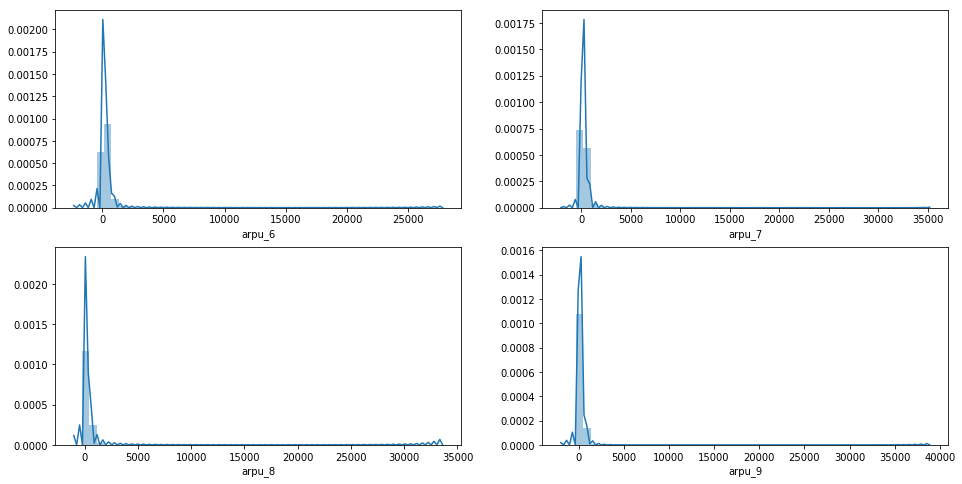

In [40]:
# subplots
plt.figure(figsize=(16,8))

# subplot 1
plt.subplot(2, 2, 1)
sns.distplot(telecomdata['arpu_6'])

# subplot 2
plt.subplot(2, 2, 2)
sns.distplot(telecomdata['arpu_7'])

# subplot 3
plt.subplot(2, 2, 3)
sns.distplot(telecomdata['arpu_8'])

# subplot 4
plt.subplot(2, 2, 4)
sns.distplot(telecomdata['arpu_9'])

plt.show()

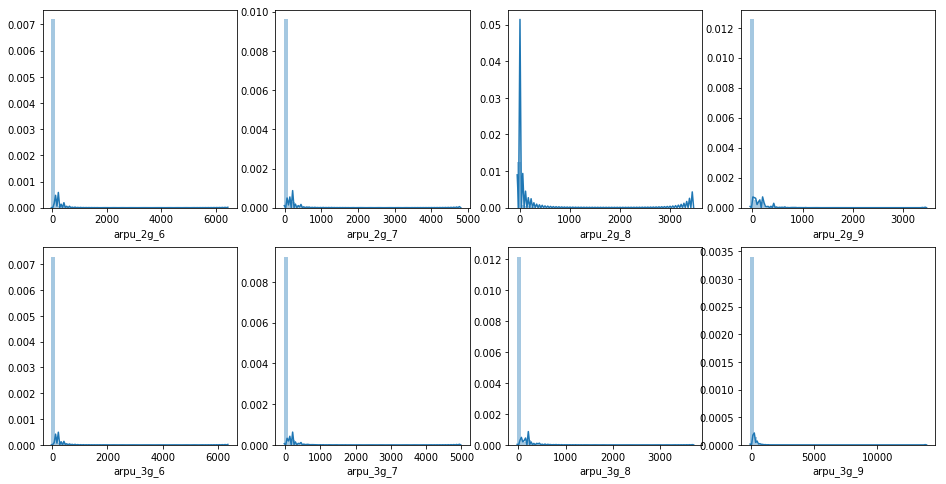

In [41]:
# subplots
plt.figure(figsize=(16,8))

# subplot 1
plt.subplot(2, 4, 1)
sns.distplot(telecomdata['arpu_2g_6'])

# subplot 2
plt.subplot(2, 4, 2)
sns.distplot(telecomdata['arpu_2g_7'])

# subplot 3
plt.subplot(2, 4, 3)
sns.distplot(telecomdata['arpu_2g_8'])

# subplot 4
plt.subplot(2, 4, 4)
sns.distplot(telecomdata['arpu_2g_9'])

# subplot 1
plt.subplot(2, 4, 5)
sns.distplot(telecomdata['arpu_3g_6'])

# subplot 2
plt.subplot(2, 4, 6)
sns.distplot(telecomdata['arpu_3g_7'])

# subplot 3
plt.subplot(2, 4, 7)
sns.distplot(telecomdata['arpu_3g_8'])

# subplot 4
plt.subplot(2, 4, 8)
sns.distplot(telecomdata['arpu_3g_9'])

plt.show()

#### Creating Dervied Attributes

In [42]:
# Average recharge amount in the first two months
telecomdata['avg_rech_amt'] =  ((telecomdata['total_rech_amt_6']+ telecomdata['av_rech_amt_data_6']) 
                                + (telecomdata['total_rech_amt_7']+ telecomdata['av_rech_amt_data_7']))/2
#Total Local Incoming calls
telecomdata
#Total 2g data usage 

# Total 3g data Usage 


,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,...,1,1,1,0,968,30.40,0.00,101.20,3.58,559.0
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,...,0,1,1,0,1006,0.00,0.00,0.00,0.00,306.0
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,...,0,0,0,1,1103,0.00,0.00,4.17,0.00,241.5
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,...,0,0,0,0,2491,0.00,0.00,0.00,0.00,270.0
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,...,0,0,0,0,1526,0.00,0.00,0.00,0.00,301.0
5,7000286308,50.258,58.810,83.386,170.826,50.16,43.63,85.48,138.79,19.28,...,0,0,0,0,1471,0.00,0.00,0.00,0.00,60.0
6,7001051193,429.023,190.704,255.114,114.751,71.03,45.03,76.66,15.23,262.73,...,0,0,0,0,1673,0.00,0.00,0.00,0.00,360.5
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,...,0,0,0,0,802,57.74,19.38,18.74,0.00,1185.0
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,1,1,0,315,21.03,910.65,122.16,0.00,607.5
9,7001864400,119.518,247.435,170.231,160.042,33.89,30.11,22.43,27.84,63.48,...,0,1,0,0,902,0.00,0.00,0.00,0.00,284.5


In [43]:
np.percentile(telecomdata['avg_rech_amt'] , 70)

431.0

In [44]:
highvaluecustdata = telecomdata.loc[telecomdata['avg_rech_amt'] >= np.percentile(telecomdata['avg_rech_amt'] , 70)]
highvaluecustdata.shape

(30015, 211)

In [45]:
highvaluecustdata.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,...,1,1,1,0,968,30.40,0.00,101.20,3.58,559.0
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,...,0,0,0,0,802,57.74,19.38,18.74,0.00,1185.0
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,1,1,0,315,21.03,910.65,122.16,0.00,607.5
16,7000875565,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,...,0,0,0,0,511,0.00,2.45,21.89,0.00,459.0
21,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,...,0,0,0,0,720,0.00,0.00,0.00,0.00,640.0


In [46]:
def findchurn(row):
    if((row['total_ic_mou_9'] > 0) | (row['total_og_mou_9'] > 0) | (row['vol_2g_mb_9'] > 0) | (row['vol_3g_mb_9'] > 0)):
        return 0
    else:
        return 1

highvaluecustdata['churn'] = highvaluecustdata.apply(findchurn, axis=1)

In [47]:
highvaluecustdata[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,1
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
16,334.56,255.74,0.00,0.00,0
21,252.61,1031.53,0.00,0.00,0
33,114.16,1.70,30.92,5588.11,0
38,114.09,708.04,0.00,0.00,0
41,165.84,89.13,0.00,0.00,0
48,894.81,2319.01,0.00,0.00,0
53,680.61,503.06,0.82,0.00,0


In [48]:
print(highvaluecustdata['churn'].astype('category').value_counts())

0    27555
1     2460
Name: churn, dtype: int64


#### Drop the data related to the last month before buildong the model

In [49]:
cols = [c for c in highvaluecustdata.columns if c[-1] == '9']
churndata = highvaluecustdata.drop(cols,axis = 1)


In [50]:
print(churndata.info())
print("\n")
print(churndata.shape)
X_churn= churndata.drop('churn',axis=1)
Y_churn=churndata['churn']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30015 entries, 0 to 99998
Columns: 161 entries, mobile_number to churn
dtypes: float64(128), int64(32), object(1)
memory usage: 37.1+ MB
None


(30015, 161)


#### Performing PCA

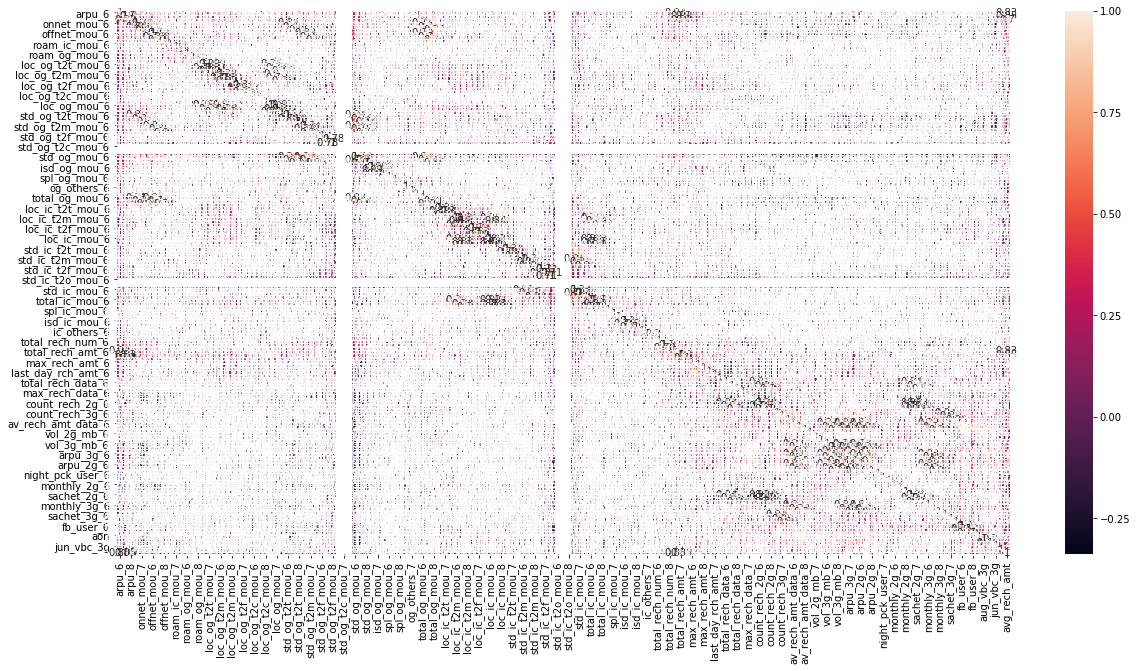

In [51]:
plt.figure(figsize = (20,10)) 
sns.heatmap(X_churn.corr(),annot = True)

In [52]:
#The final matrix would only contain the data columns. Hence let's drop the mobile number column
X_churn =X_churn.drop(['mobile_number'],axis=1)
X_churn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,1,1,968,30.40,0.00,101.20,3.58,559.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,0,0,802,57.74,19.38,18.74,0.00,1185.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,1,1,315,21.03,910.65,122.16,0.00,607.5
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0,0,0,0,511,0.00,2.45,21.89,0.00,459.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,...,0,0,0,0,720,0.00,0.00,0.00,0.00,640.0


In [53]:
# Scaling the data before applying PCA
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_churn_pca = standard_scaler.fit_transform(X_churn)
X_churn_pca

array([[-0.84419956, -0.77518347, -0.62655662, ..., -0.1264119 ,
        -0.07732698, -0.45703665],
       [ 1.0975395 ,  1.64494942,  5.33638973, ..., -0.32466425,
        -0.14724021,  0.6935333 ],
       [-0.44031196, -0.18369299, -0.78066864, ..., -0.07601935,
        -0.14724021, -0.36789505],
       ...,
       [-0.58767605, -0.13953702, -0.24697303, ..., -0.36971942,
        -0.14724021, -0.48460622],
       [-0.56443875, -0.58633347,  0.16579541, ...,  2.45086872,
        -0.14724021,  0.05943325],
       [ 0.24645912, -1.23321668, -1.05760295, ..., -0.36971942,
        -0.14724021, -0.69045899]])

In [54]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [55]:
#let's apply PCA
pca.fit(X_churn_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [56]:
#List of PCA components.It would be the same as the number of variables
pca.components_

array([[-4.52701280e-03, -3.82607839e-03,  5.19640734e-03, ...,
         1.40666451e-01,  3.54990434e-02,  6.77358465e-02],
       [ 1.68809070e-01,  1.82358462e-01,  1.82505885e-01, ...,
         3.49678982e-02,  1.47918511e-02,  1.83971738e-01],
       [ 1.00233146e-01,  1.22235317e-01,  1.06275988e-01, ...,
         2.96853734e-02,  1.07113032e-02,  1.30776452e-01],
       ...,
       [ 0.00000000e+00, -2.55249944e-17,  1.57028282e-17, ...,
        -1.88823886e-17,  1.78933062e-17, -1.17810705e-12],
       [-0.00000000e+00,  1.66027884e-16,  1.42495437e-16, ...,
        -8.60819845e-17,  4.29617969e-17, -9.23527858e-13],
       [ 0.00000000e+00, -2.94655617e-16, -1.09543852e-16, ...,
         1.26617282e-16, -8.88667968e-17, -7.71663085e-13]])

In [57]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([1.06198999e-01, 8.85042728e-02, 6.70595133e-02, 5.61572812e-02,
       3.84393595e-02, 3.38949162e-02, 2.84148336e-02, 2.60124710e-02,
       2.42223852e-02, 2.22423927e-02, 2.08004046e-02, 1.92752789e-02,
       1.88473774e-02, 1.80306667e-02, 1.73900964e-02, 1.71091523e-02,
       1.58708550e-02, 1.43506188e-02, 1.34454036e-02, 1.26422375e-02,
       1.24701738e-02, 1.21796198e-02, 1.16005521e-02, 1.08278473e-02,
       1.04952178e-02, 1.03241840e-02, 9.18986384e-03, 8.95430595e-03,
       8.44737238e-03, 8.14413069e-03, 7.72201031e-03, 7.47174037e-03,
       7.29801113e-03, 7.27555803e-03, 6.99542113e-03, 6.41916981e-03,
       6.26389637e-03, 6.13685449e-03, 5.97571925e-03, 5.83608944e-03,
       5.54587485e-03, 5.49102221e-03, 5.29552239e-03, 5.22857433e-03,
       5.11223219e-03, 4.94023625e-03, 4.76793214e-03, 4.69557940e-03,
       4.61998367e-03, 4.37795864e-03, 4.14535866e-03, 4.06286486e-03,
       4.01494897e-03, 3.90966215e-03, 3.81741481e-03, 3.61630385e-03,
      

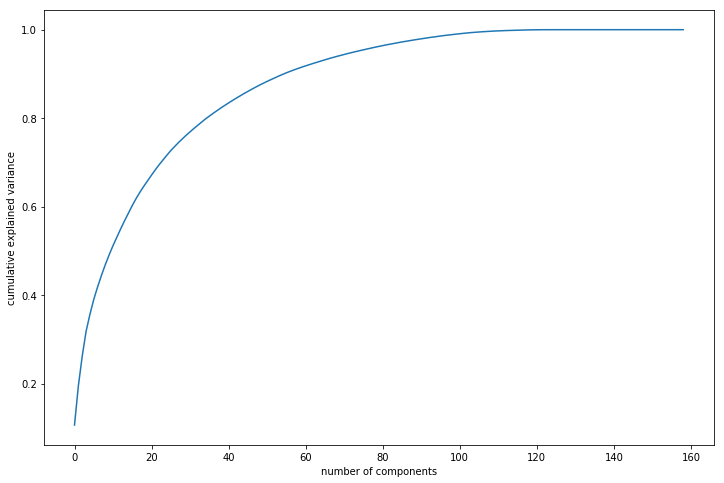

In [58]:
#Plotting the scree plot
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Clearly over 90% of the data is properly explained by the first 70 principal components. Let's use them only for our clustering process

In [59]:
#Let's try and check the first 2 components now
colnames = list(X_churn.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,arpu_6,-0.004527,0.168809,0.100233
1,arpu_7,-0.003826,0.182358,0.122235
2,arpu_8,0.005196,0.182506,0.106276
3,onnet_mou_6,-0.090384,0.072187,0.100707
4,onnet_mou_7,-0.095448,0.081068,0.117889
5,onnet_mou_8,-0.085448,0.087989,0.111954
6,offnet_mou_6,-0.086106,0.126014,0.064932
7,offnet_mou_7,-0.091013,0.134259,0.084269
8,offnet_mou_8,-0.075958,0.138020,0.075307
9,roam_ic_mou_6,-0.003776,0.018031,0.018222


In [60]:
#We are observing 90% variance with 80 principal components. So let's take the data until that many components
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=70)

In [61]:
#let's project our original data on the 3 principal components
df_train_pca = pca_final.fit_transform(X_churn_pca)
df_train_pca.shape

(30015, 70)

In [62]:
#take the transpose of the PC matrix so that we can create the new matrix
pc = np.transpose(df_train_pca)
pc

array([[ 4.29108971e+00,  1.78194677e-01, -4.16902526e-01, ...,
        -3.64200476e-01,  9.94438631e+00, -3.41406317e-01],
       [-2.81913935e+00,  6.93121518e+00, -3.11345880e+00, ...,
         1.12060833e+00, -1.40049011e+00, -3.42950338e+00],
       [ 4.43235843e-01, -1.58871683e+00, -2.52189101e-02, ...,
        -3.74447395e+00,  2.97017454e+00, -2.14195336e+00],
       ...,
       [ 8.21954678e-02,  4.97495741e-01,  9.83775062e-02, ...,
         3.44230984e-01, -2.35961848e-03,  6.03098951e-01],
       [-4.00534252e-01,  2.37775442e+00, -5.94751703e-01, ...,
        -5.50498474e-01, -2.99683516e-01,  6.01558708e-01],
       [-2.07503993e-01, -2.28008489e-01, -7.56729072e-01, ...,
        -8.24085818e-01, -2.61151198e-01,  1.04980923e+00]])

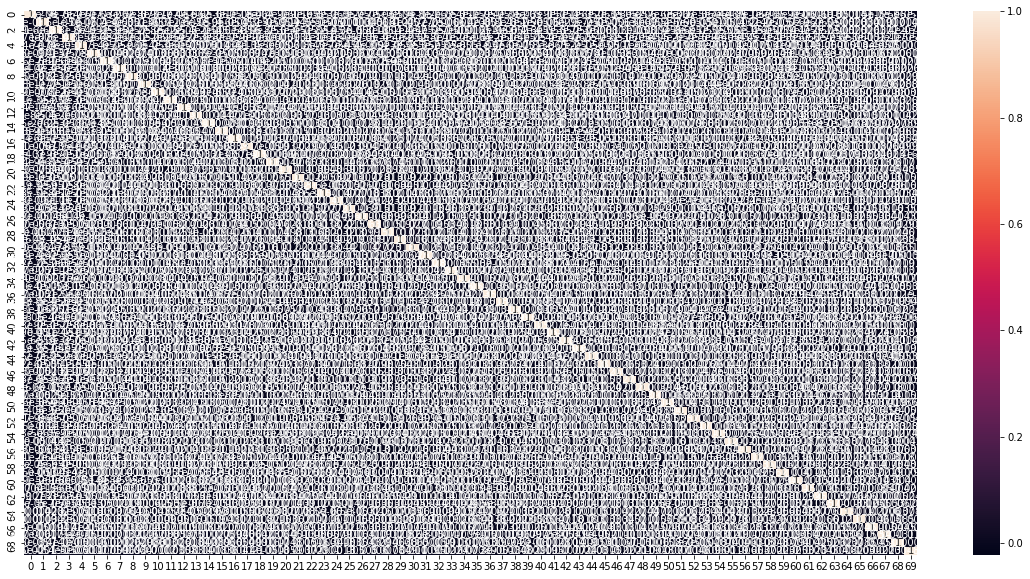

In [63]:
corrmat = np.corrcoef(df_train_pca.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [64]:

corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are   close to 0

max corr: 0.026869921765238804 , min corr:  -0.02154928434272269


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_pca,Y_churn, train_size=0.7,test_size=0.3,random_state=100)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
sample = SMOTE(sampling_strategy='auto', random_state=3)
over_x_train,over_y_train=sample.fit_sample(X_train,y_train)
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(over_x_train,over_y_train)

In [67]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(X_test)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-1,1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)   
        

# fit the model
model_cv.fit(over_x_train,over_y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
best_C=model_cv.best_params_['C']
best_G=model_cv.best_params_['gamma']
print (best_C)
print (best_G)

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.5])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1.5])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1.5])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

In [ ]:
# model with optimal hyperparameters

model = SVC(C=best_C, gamma=best_G, kernel="rbf")

model.fit(over_samp_x_train,over_samp_y_train)
y_pred = model.predict(x_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_churn,Y_churn, train_size=0.7,test_size=0.3,random_state=100)
sm = SMOTE(sampling_strategy='auto', random_state=3)
over_samp_x_train,over_samp_y_train=sm.fit_sample(X_train,y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("After OverSampling, counts of label '1': {}".format(sum(over_samp_y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(over_samp_y_train==0)))



from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(over_samp_x_train, over_samp_y_train)
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

Before OverSampling, counts of label '1': 1748
Before OverSampling, counts of label '0': 19262 

After OverSampling, counts of label '1': 19262
After OverSampling, counts of label '0': 19262
              precision    recall  f1-score   support

           0       0.98      0.88      0.92      8293
           1       0.35      0.75      0.48       712

    accuracy                           0.87      9005
   macro avg       0.66      0.82      0.70      9005
weighted avg       0.93      0.87      0.89      9005



In [69]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7285 1008]
 [ 176  536]]
0.868517490283176


In [70]:
# Putting features
features = list(X_train.columns[1:])
features

['arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_

In [75]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

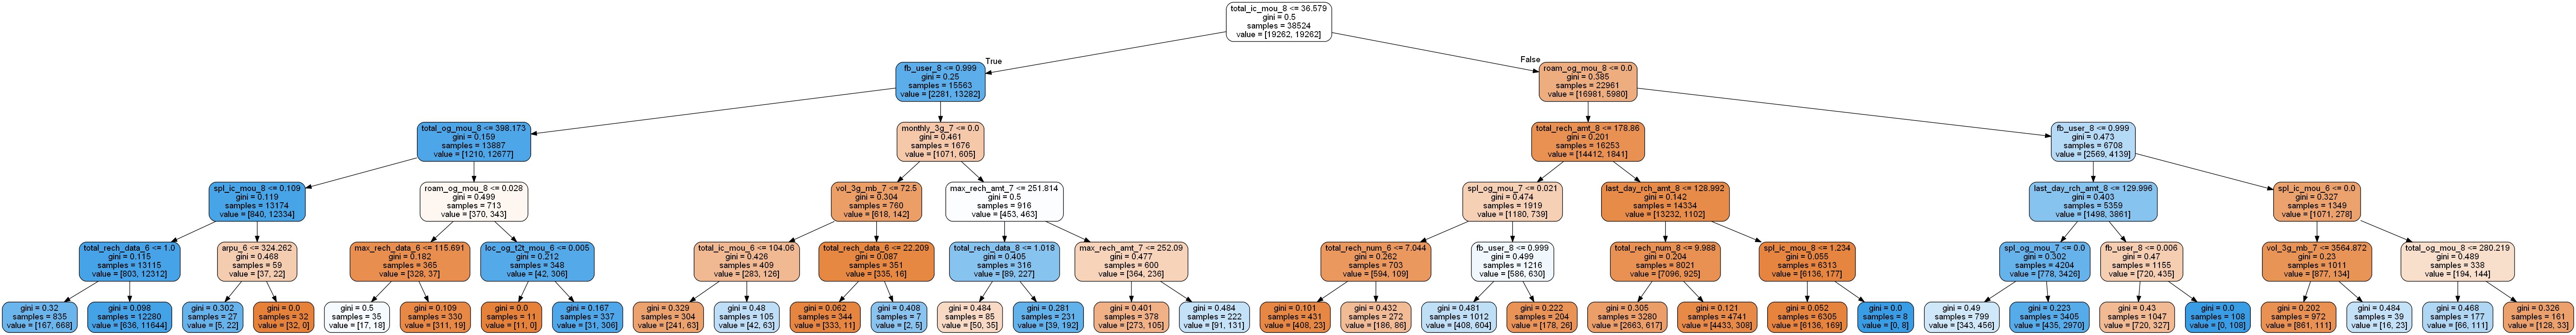

In [76]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,feature_names=X_train.columns, filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [77]:
#'min_samples_leaf': range(5, 200, 20),
#             'min_samples_split': range(5, 200, 20),
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = RandomForestClassifier()

# fit tree on training data
tree = GridSearchCV(estimator = dtree, param_grid = parameters, 
                          cv = n_folds, verbose = 1,scoring='accuracy',return_train_score=True)
tree.fit(over_samp_x_train, over_samp_y_train)


Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  9.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [78]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.688952,0.130765,0.034081,0.009093,1,{'max_depth': 1},0.812743,0.793278,0.796469,0.824766,...,0.800696,0.016712,39,0.816179,0.797618,0.792959,0.829721,0.778910,0.803077,0.017876
1,0.983101,0.136957,0.035878,0.015317,2,{'max_depth': 2},0.801843,0.813911,0.831386,0.815161,...,0.819775,0.012605,38,0.797878,0.813031,0.824010,0.824205,0.836080,0.819041,0.012851
2,1.595724,0.211742,0.042263,0.018648,3,{'max_depth': 3},0.850766,0.842460,0.845794,0.856698,...,0.847939,0.005196,37,0.855539,0.845058,0.838287,0.862070,0.840234,0.848238,0.009142
3,2.110207,0.531050,0.050578,0.016486,4,{'max_depth': 4},0.853880,0.875552,0.876038,0.854491,...,0.863825,0.009944,36,0.870400,0.875982,0.872485,0.861097,0.855289,0.867051,0.007672
4,1.267457,0.063704,0.025646,0.003475,5,{'max_depth': 5},0.859201,0.886063,0.898235,0.887850,...,0.885422,0.013894,35,0.885262,0.888993,0.888968,0.893413,0.890785,0.889484,0.002663


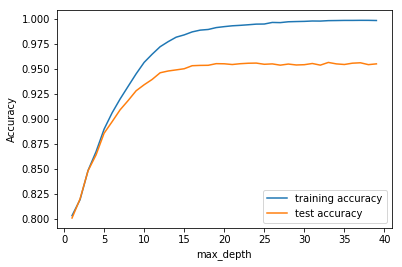

In [79]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [80]:
#'min_samples_leaf': range(5, 200, 20),
#             'min_samples_split': range(5, 200, 20),
#,'max_features': [10,20,30,40,50,60,70,80,90,100]
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': [20,30,40,50,60,70,80,90,100]}

# instantiate the model
dtree = RandomForestClassifier(max_depth=5)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, param_grid = parameters, 
                          cv = n_folds, verbose = 1,scoring='accuracy',return_train_score=True)
tree.fit(over_samp_x_train, over_samp_y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [81]:
# scores of GridSearch CV
scores2 = tree.cv_results_
pd.DataFrame(scores2).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.677033,0.343356,0.029984,0.008828,20,{'min_samples_leaf': 20},0.869323,0.892421,0.885774,0.889408,...,0.883268,0.008211,5,0.897495,0.893212,0.880273,0.890526,0.880532,0.888407,0.006904
1,1.410487,0.109562,0.023922,0.004374,30,{'min_samples_leaf': 30},0.872178,0.894757,0.891615,0.884605,...,0.887525,0.008502,2,0.902752,0.891330,0.885983,0.888449,0.889130,0.891529,0.005865
2,1.290259,0.147749,0.023788,0.000400,40,{'min_samples_leaf': 40},0.859590,0.888269,0.890317,0.885644,...,0.882852,0.011762,6,0.885749,0.887339,0.888514,0.885010,0.888546,0.887031,0.001437
3,1.265467,0.093653,0.024190,0.002037,50,{'min_samples_leaf': 50},0.870880,0.889307,0.898624,0.895119,...,0.888303,0.009572,1,0.896846,0.886917,0.893186,0.895457,0.885821,0.891645,0.004477
4,1.494901,0.172350,0.028662,0.005896,60,{'min_samples_leaf': 60},0.870101,0.890215,0.893432,0.880841,...,0.883761,0.008131,4,0.899215,0.887923,0.888352,0.882933,0.883647,0.888414,0.005825


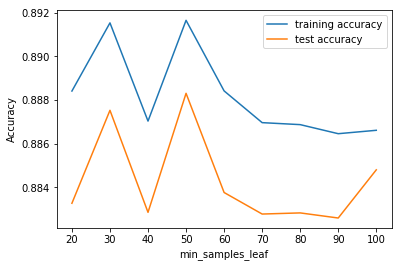

In [82]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores2["param_min_samples_leaf"], 
         scores2["mean_train_score"], 
         label="training accuracy")
plt.plot(scores2["param_min_samples_leaf"], 
         scores2["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [83]:
#'min_samples_leaf': range(5, 200, 20),
#             'min_samples_split': range(5, 200, 20),
#,'max_features': [10,20,30,40,50,60,70,80,90,100]
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = RandomForestClassifier(max_depth=5)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, param_grid = parameters, 
                          cv = n_folds, verbose = 1,scoring='accuracy',return_train_score=True)
tree.fit(over_samp_x_train, over_samp_y_train)
# scores of GridSearch CV
scores2 = tree.cv_results_
pd.DataFrame(scores2).head()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.738920,0.267999,0.025999,0.005912,5,{'min_samples_split': 5},0.869712,0.884635,0.896937,0.891225,...,0.886954,0.009474,2,0.896067,0.885586,0.888449,0.891791,0.888774,0.890133,0.003559
1,1.425626,0.212573,0.028780,0.004938,25,{'min_samples_split': 25},0.857254,0.892941,0.894990,0.886942,...,0.886071,0.014873,4,0.883055,0.891946,0.891791,0.890753,0.893154,0.890140,0.003623
2,1.389801,0.175402,0.025385,0.001355,45,{'min_samples_split': 45},0.868414,0.880613,0.887850,0.883048,...,0.882307,0.007922,8,0.895808,0.884191,0.880337,0.886697,0.887151,0.886837,0.005096
3,1.408991,0.144049,0.026794,0.002856,65,{'min_samples_split': 65},0.859849,0.892292,0.898105,0.887980,...,0.885292,0.013240,7,0.889578,0.890162,0.891467,0.890850,0.883971,0.889205,0.002693
4,1.412996,0.173541,0.028044,0.005323,85,{'min_samples_split': 85},0.868025,0.887490,0.882918,0.894470,...,0.885500,0.009791,5,0.892206,0.887858,0.879104,0.892635,0.890266,0.888414,0.004952


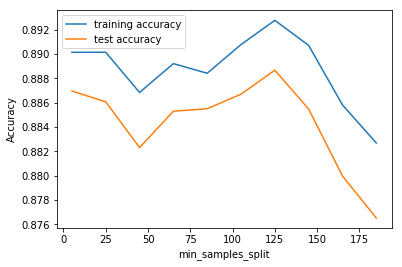

In [84]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores2["param_min_samples_split"], 
         scores2["mean_train_score"], 
         label="training accuracy")
plt.plot(scores2["param_min_samples_split"], 
         scores2["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [85]:
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model
dtree = RandomForestClassifier(max_depth=5)

# fit tree on training data
tree = GridSearchCV(estimator = dtree, param_grid = parameters, 
                          cv = n_folds, verbose = 1,scoring='accuracy',return_train_score=True)
tree.fit(over_samp_x_train, over_samp_y_train)
# scores of GridSearch CV
scores2 = tree.cv_results_
pd.DataFrame(scores2).head()

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 31.9min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.667408,0.832323,0.154388,0.004151,100,{'n_estimators': 100},0.874903,0.894757,0.903427,0.891355,...,0.892742,0.009809,4,0.905283,0.894088,0.897826,0.895230,0.895295,0.897544,0.004058
1,63.399575,0.973306,0.731003,0.014067,500,{'n_estimators': 500},0.876330,0.896704,0.900701,0.892264,...,0.892924,0.008753,2,0.906581,0.895256,0.895328,0.895263,0.894517,0.897389,0.004606
2,117.010923,1.727462,1.288488,0.076229,900,{'n_estimators': 900},0.875292,0.898131,0.899403,0.892783,...,0.892794,0.009051,3,0.906191,0.897041,0.894809,0.895782,0.894549,0.897674,0.004347
3,170.011934,6.266877,1.951283,0.140449,1300,{'n_estimators': 1300},0.876719,0.898002,0.902518,0.892004,...,0.893469,0.009018,1,0.907132,0.896165,0.896398,0.896074,0.894062,0.897966,0.004659


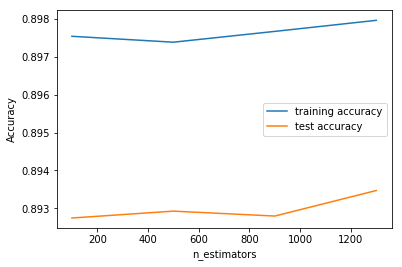

In [86]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores2["param_n_estimators"], 
         scores2["mean_train_score"], 
         label="training accuracy")
plt.plot(scores2["param_n_estimators"], 
         scores2["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [87]:
n_folds = 5

# parameters to build the model on
parameters = {'max_features': range(10, 90, 5)}
dtree = RandomForestClassifier(max_depth=5)
tree = GridSearchCV(estimator = dtree, param_grid = parameters, 
                          cv = n_folds, verbose = 1,scoring='accuracy',return_train_score=True)
tree.fit(over_samp_x_train, over_samp_y_train)
# scores of GridSearch CV
scores2 = tree.cv_results_
pd.DataFrame(scores2).head()

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  7.4min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.395786,0.225986,0.032980,0.008554,10,{'max_features': 10},0.863743,0.889567,0.876817,0.884476,...,0.877245,0.009146,16,0.883575,0.886560,0.873978,0.884101,0.872777,0.880198,0.005672
1,1.629777,0.053452,0.025985,0.002098,15,{'max_features': 15},0.870231,0.895276,0.891615,0.896807,...,0.891496,0.011316,15,0.901746,0.895678,0.888027,0.896236,0.897664,0.895870,0.004459
2,2.304543,0.141212,0.034439,0.013928,20,{'max_features': 20},0.872307,0.894757,0.902259,0.886942,...,0.893028,0.012695,14,0.901616,0.893050,0.898507,0.888417,0.901038,0.896526,0.005060
3,2.888490,0.287648,0.026991,0.001999,25,{'max_features': 25},0.873865,0.896574,0.902129,0.898105,...,0.894118,0.010296,13,0.903466,0.897300,0.897696,0.898443,0.896334,0.898648,0.002503
4,3.134203,0.143161,0.026189,0.001939,30,{'max_features': 30},0.875422,0.900208,0.903686,0.896547,...,0.895390,0.010244,11,0.902103,0.897982,0.899740,0.899286,0.896950,0.899212,0.001748


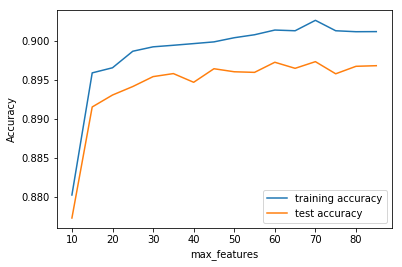

In [88]:
# plotting accuracies 
plt.figure()
plt.plot(scores2["param_max_features"], 
         scores2["mean_train_score"], 
         label="training accuracy")
plt.plot(scores2["param_max_features"], 
         scores2["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#OPtimmum values from all the above models deduced
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
param_grid = {
    'max_depth': [5,6,7],
    'min_samples_leaf': range(30, 45, 10),
    'min_samples_split': range(60, 85, 10),
    'n_estimators': [500], 
    'max_features': [20,35,40]
}
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = n_folds, n_jobs = -1,verbose = 1,return_train_score=True)
grid_search.fit(over_samp_x_train, over_samp_y_train)
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# model with the best hyperparameters
md=grid_search.best_params_['max_depth']
msl=grid_search.best_params_['min_samples_leaf']
mss=grid_search.best_params_['min_samples_split']
mf=grid_search.best_params_['max_features']
ne=grid_search.best_params_['n_estimators']
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=md,
                             min_samples_leaf=msl, 
                             min_samples_split=mss,
                             max_features=mf,
                             n_estimators=me)
# fit
rfc.fit(over_samp_x_train, over_samp_y_train)
# predict
predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))